# South German Credit Risk Prediction

Credit risk infers to the possibility of a loss emerging from a borrower's downfall to pay back a loan or meet contractual commitments. Conventionally, it pertains to the risk arising from lenders' inability to return the owed interest and principal, impacting the cash flows and increasing assemblage costs. We used German credit data using Random forest (along with over-sampling and under-sampling methods).The aim is to predict credit risk when a person requests for loan.
You have to build a model to predict whether the person, described by the attributes of this dataset, is a good (1) or a bad (0) credit risk?

For more information please read the [data documentation](https://archive.ics.uci.edu/dataset/573/south+german+credit+update).


# Import required libraries

pandas and numpy are used to perform data manipulation and related tasks. For visualization purposes, we will use matplotlib and seaborn along with pandas' visualization capabilities wherever possible.

In [ ]:
import pandas as pd
import numpy as np

# Read credit risk dataset

Read the credit risk data form Google drive and check the shape of the loaded dataframe.
* Use **read_csv()** function from pandas to load the CSV into a DataFrame with a space as a delimiter, including key components as:
  * **filepath_or_buffer** provides a string representing the path to the file, including local files, URLs, URL schemes.
  * **sep** and **delimiter** use a string to indicate what character(s) delimit the file.
* Print data size (The shape of an array is the number of elements in each dimension.).

In [ ]:
credit_data = pd.read_csv(r'Data.asc', delimiter=" ")
print("Credit risk data size: ", credit_data.shape)

Credit risk data size:  (1000, 21)


* **Check the top few rows to see how the data looks.**
* **Use the head(n=5) utility from pandas**

head(n) returns the first n rows.

In [ ]:
# pandas display data frames as table
pd.set_option('display.max_columns', None)
credit_data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


Print a concise summary of dataframe using **info()** function and check if the dataset has missing values or not

In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status          1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

**Display statistical summary of data by using describe() function**

In [ ]:
credit_data.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


# Exploratory Data Analysis (EDA)

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [ ]:
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Check sample distributions in each class label**

* Use the Seaborn's **countplot()** function to visualize the class distribution

A count plot is similar to a bar plot and a histogram and provides counts of categorical values.

<Axes: xlabel='credit_risk', ylabel='count'>

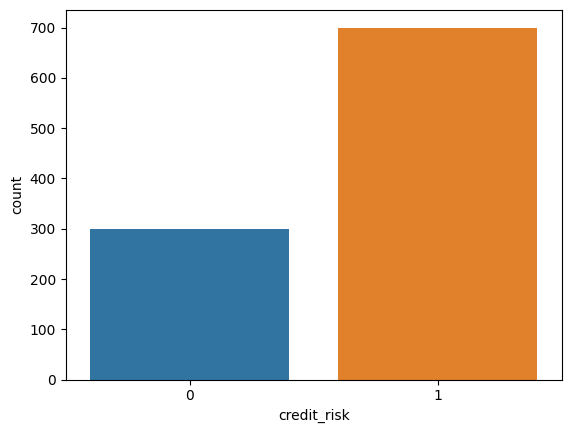

In [ ]:
# Draw a Histogram
sns.countplot(data=credit_data, x="credit_risk")

**Compute imbalance ratio**

* Use numpy's **unique()** function to obtain unique values of credit_risk label
* Use numpy's **bincount()** function to count sample numbers of each class label

In [ ]:
print("Unique lables: ", np.unique(credit_data["credit_risk"]))
class_dist = np.bincount(credit_data["credit_risk"])
print("Number of samples in each class label:", class_dist)
print("Imbalance ratio:", class_dist/np.min(class_dist))

Unique lables:  [0 1]
Number of samples in each class label: [300 700]
Imbalance ratio: [1.         2.33333333]


* Credit risk prediction risk data is partially imbalanced.

Imbalanced data refers to those types of datasets where one class label has a very high number of samples and the other has a very low number of samples.

* **Visualize duration counts vs. employment_duration for each class label**
* Use point plots for focusing comparisons between different levels of one or more categorical variables.

<Axes: xlabel='employment_duration', ylabel='duration'>

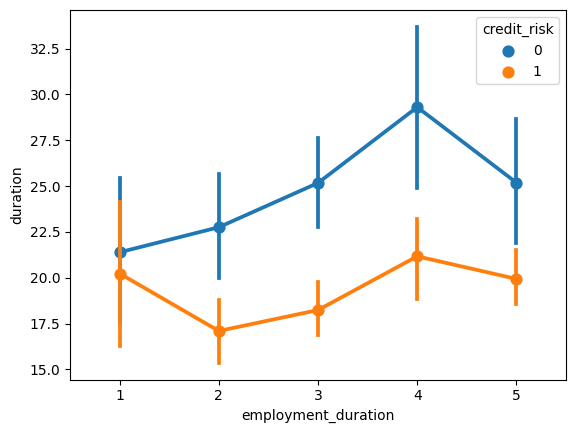

In [ ]:
sns.pointplot(data=credit_data, x="employment_duration", y='duration', hue='credit_risk')

* **Visualize amount counts vs. employment_duration for each class label**

<Axes: xlabel='employment_duration', ylabel='amount'>

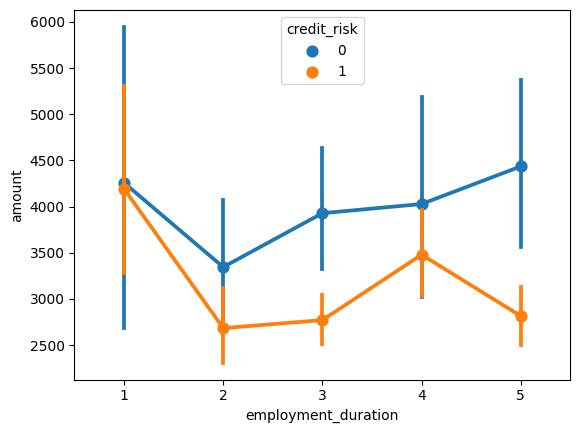

In [ ]:
sns.pointplot(data=credit_data, x="employment_duration", y='amount', hue='credit_risk')

* **Visualize amount counts vs. installment_rate for each class label**

<Axes: xlabel='installment_rate', ylabel='amount'>

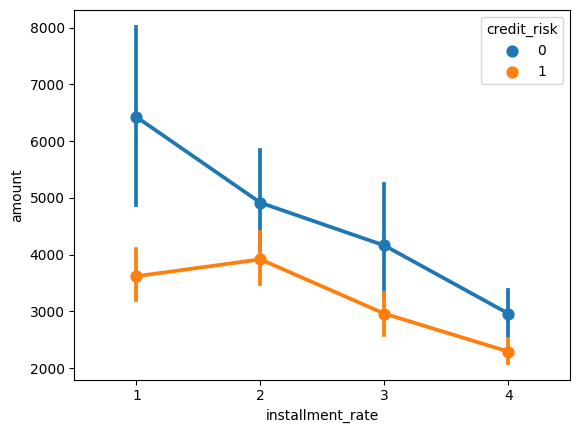

In [ ]:
sns.pointplot(data=credit_data, x="installment_rate", y='amount', hue='credit_risk')

* **Visualize age counts vs. present_residence for each class label**

<Axes: xlabel='present_residence', ylabel='age'>

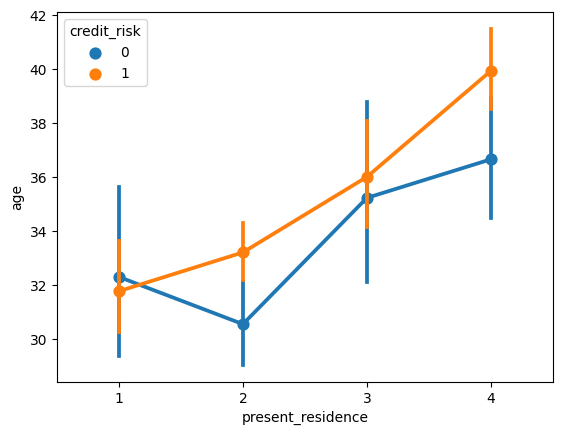

In [ ]:
sns.pointplot(data=credit_data, x="present_residence", y='age', hue='credit_risk')

* **Visualize duration counts vs. property for each class label**

<Axes: xlabel='property', ylabel='duration'>

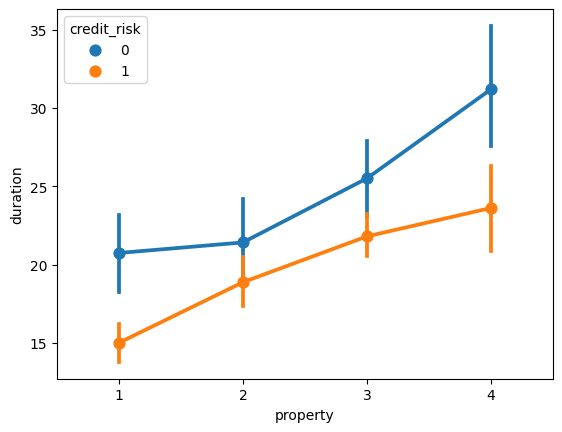

In [ ]:
sns.pointplot(data=credit_data, x="property", y='duration', hue='credit_risk')

* **Visualize amount counts vs. property for each class label**

<Axes: xlabel='property', ylabel='amount'>

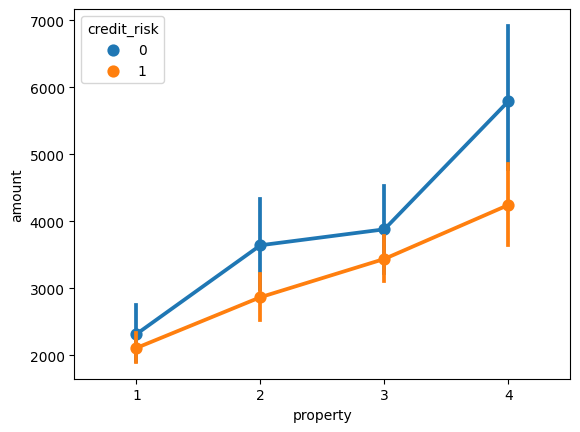

In [ ]:
sns.pointplot(data=credit_data, x="property", y='amount', hue='credit_risk')

* **Visualize duration counts vs. job for each class label**

<Axes: xlabel='job', ylabel='duration'>

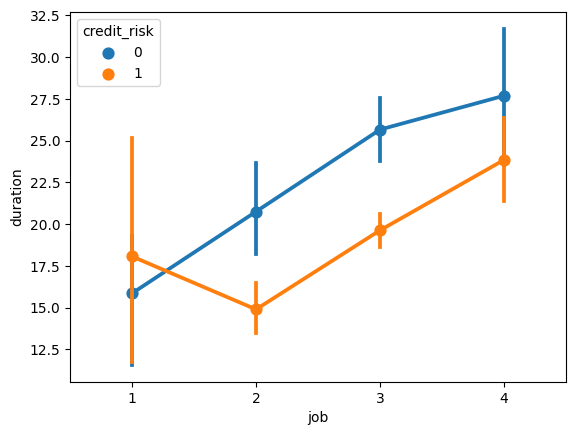

In [ ]:
sns.pointplot(data=credit_data, x="job", y='duration', hue='credit_risk')

* Use **countplot()** function to create a histogram and visualize the distribution of **credit_history** for each class label

<Axes: xlabel='credit_history', ylabel='count'>

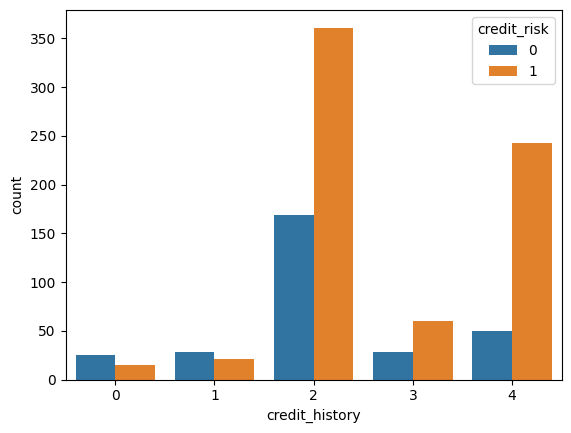

In [ ]:
sns.countplot(data=credit_data, x="credit_history", hue="credit_risk")

* Use the Seaborn's **histplot()** function to create histograms to visualize the distribution of **duration** feature

<Axes: xlabel='duration', ylabel='Count'>

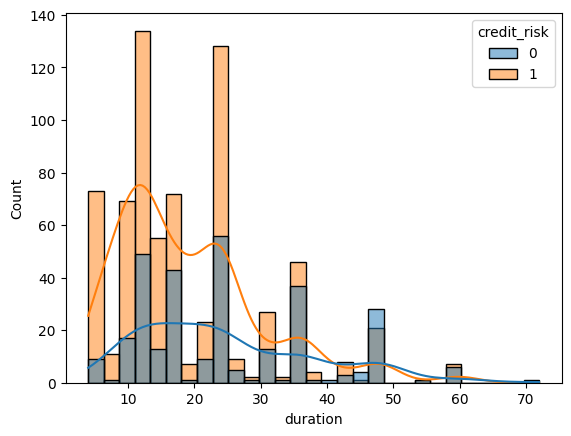

In [ ]:
sns.histplot(data=credit_data, x="duration", hue="credit_risk", kde=True)

# Model Design

# Model Evaluation

The dataset is usually divided at hand into training and testing sets to evaluate the performance of the models.

* Use scikit-learn's train_test_split() function available through model_selection module.
  * **X**: data matrix
  * **y**: class label vector
  * **test_size**: represent the proportion of the dataset to include in the test split
  *  **stratify**:  data is split in a stratified fashion (reserving the percentage of samples for each class), using this as the class labels.
  * **random_state**: Controls the shuffling applied to the data before applying the split

* Split our dataset into 70% and 30% as train and test, respectively.

In [ ]:
from sklearn.model_selection import train_test_split

# data
X = credit_data.drop(columns = ['credit_risk'])
# class label
y = credit_data['credit_risk']
# Split X & y into training ad test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1402)

# print training and test size
print()
print("Training set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape)


Training set:  (700, 20) (700,)
Testing set:  (300, 20)


# Normalize continuous features

In [ ]:
# normalize features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cont_columns = ['duration', 'amount', 'age']

scaler.fit(X_train[cont_columns])

X_train[cont_columns] = scaler.transform(X_train[cont_columns])
X_test[cont_columns] = scaler.transform(X_test[cont_columns])

print("Min %0.2f & Max %0.2f of trainging data" %(np.min(X_train[cont_columns].values), np.max(X_train[cont_columns].values)))

Min 0.00 & Max 1.00 of trainging data


# Encode categorical features

 * Transform categorical variables to binary variables and prepare a list of encoded attributes
 * Encode categorical features as a one-hot numeric array usig **OneHotEncoder**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
# handle_unknown Specifies the way unknown categories are handled during transform
encoder = OneHotEncoder(handle_unknown = 'ignore')

cat_columns = ['status', 'credit_history', 'purpose', 'savings', 'personal_status',
               'other_debtors', 'other_installment_plans', 'housing']

encoder.fit(X_train[cat_columns])

enc_attr_cat_tr =  encoder.transform(X_train[cat_columns])
enc_attr_cat_te =  encoder.transform(X_test[cat_columns])

enc_attr_cat_tr = pd.DataFrame(enc_attr_cat_tr.toarray())
enc_attr_cat_te = pd.DataFrame(enc_attr_cat_te.toarray())

X_train = X_train.drop(columns = cat_columns)
X_test = X_test.drop(columns = cat_columns)

X_train = np.concatenate((X_train.values, enc_attr_cat_tr.values), axis = 1)
X_test = np.concatenate((X_test.values, enc_attr_cat_te.values), axis = 1)

print("Training data size: ", X_train.shape)
print("Test data size: ", X_test.shape)

Training data size:  (700, 49)
Test data size:  (300, 49)


* **Check the top few rows to see how the data looks using head() function.**

In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0.470588,0.155662,3.0,4.0,4.0,1.0,0.303571,1.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.294118,0.073457,4.0,4.0,3.0,2.0,0.375000,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.117647,0.060196,3.0,4.0,2.0,1.0,0.428571,2.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.470588,0.165016,4.0,2.0,4.0,4.0,0.357143,1.0,4.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.073529,0.183064,3.0,1.0,2.0,1.0,0.125000,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


# Random Forest Classifier

Random forest is an ensemble learning method for classification and regression problems.
Random forest fits a number of decision tree classifiers on various sub-samples of the dataset and takes their majority vote for classification and average in case of regression.

* Use  **RandomForestClassifier()** from sklearn's ensemble with key components as:
  - **n_estimators**: the number of trees in the forest
  - **max_dept**: the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 1402)
random_forest.fit(X_train, y_train)

# accuracy: (tp + tn) / (p + n)
print("Training accuracy: ", random_forest.score(X_train, y_train))
print("Test accuracy: ", random_forest.score(X_test, y_test))

Training accuracy:  1.0
Test accuracy:  0.7666666666666667


# Evaluation metrics for imbalanced data

* Report precision, recall, and f1-score for both bad and good class labels

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def Compute_IM_Scores(estimator_, X_train, y_train, X_test, y_test):
  y_pred = estimator_.predict(X_test)

  # precision tp / (tp + fp)
  precision = precision_score(y_test, y_pred, pos_label=0)
  print( "Precision for bad class: ", precision)
  precision = precision_score(y_test, y_pred, pos_label=1)
  print( "Precision for good class: ", precision)

  # recall: tp / (tp + fn)
  recall = recall_score(y_test, y_pred, pos_label=0)
  print( "Recall for bad class (TNR): ", recall)
  recall = recall_score(y_test, y_pred, pos_label=1)
  print( "Recall for good class (TPR): ", recall)

  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, y_pred, pos_label = 0)
  print( "F1 score for bad class:", f1)
  f1 = f1_score(y_test, y_pred, pos_label = 1)
  print( "F1 score for good class:", f1)

  conf_mat = confusion_matrix(y_test, y_pred, labels=np.unique(y_train))
  disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = np.unique(y_train))
  disp.plot()
  plt.show()


Precision for bad class:  0.6851851851851852
Precision for good class:  0.7845528455284553
Recall for bad class (TNR):  0.4111111111111111
Recall for good class (TPR):  0.919047619047619
F1 score for bad class: 0.513888888888889
F1 score for good class: 0.8464912280701754


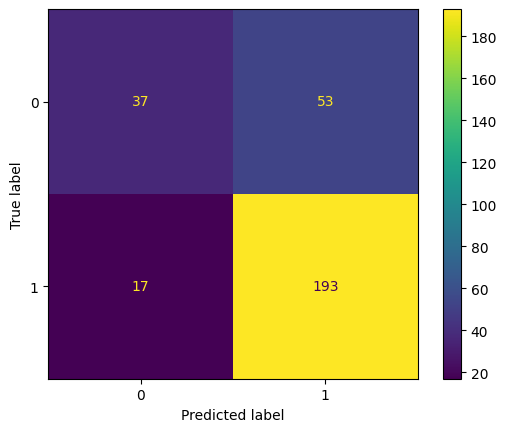

In [ ]:
Compute_IM_Scores(random_forest, X_train, y_train, X_test, y_test)

* The performance of RandomForestClassifier for bad class label is unsatisfactory.

To overcome this problem, these solutions were proposed in machine learning community:
* **Random Undersampling**: deletes a subset from the original dataset, ensuring that you have equal numbers per class, effectively discarding many of the big-quantity class samples.
* **Random Oversampling**: generates a subset from the original dataset, ensuring that you have equal numbers per class, effectively copying many of the low-quantity class samples.

# Over-sampling methods

Random oversampling involves randomly duplicating examples from the minority class and adding them to the training data.

SMOTE works by selecting k-nearest-neighbors of examples in the minor class, drawing a line between the examples in the feature space and generating a new sample at a point along that line.

* Oversample training instances of bad class label using **RandomOverSampler(), SMOTE(), BorderlineSMOTE(),** and **SVMSMOTE()** functions

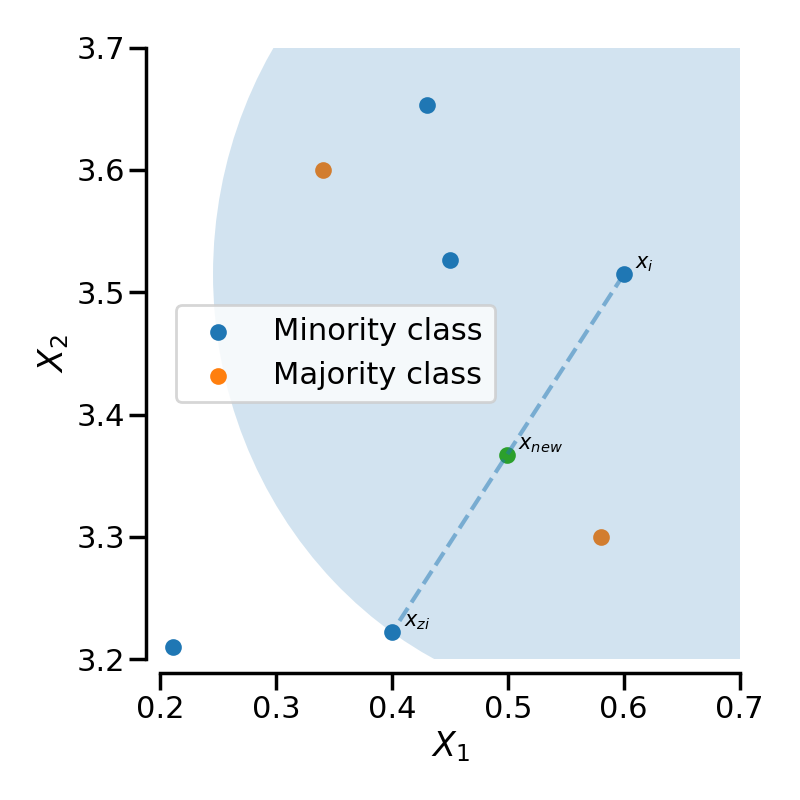

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE
over_sampler = SVMSMOTE()
X_tr_resampled, y_tr_resampled = over_sampler.fit_resample(X_train, y_train)

# predict probabilities for test set
print("Unique lables: ", np.unique(y_train))
print("class distributions for imbalanced data:", np.bincount(y_train))
print("class distributions for balanced data:", np.bincount(y_tr_resampled))

Unique lables:  [0 1]
class distributions for imbalanced data: [210 490]
class distributions for balanced data: [490 490]


In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 1402)
random_forest.fit(X_tr_resampled, y_tr_resampled)
print("Training accuracy: ", random_forest.score(X_tr_resampled, y_tr_resampled))
print("Test accuracy: ", random_forest.score(X_test, y_test))

Training accuracy:  1.0
Test accuracy:  0.7833333333333333


Precision for bad class:  0.6712328767123288
Precision for good class:  0.8193832599118943
Recall for bad class (TNR):  0.5444444444444444
Recall for good class (TPR):  0.8857142857142857
F1 score for bad class: 0.6012269938650308
F1 score for good class: 0.851258581235698


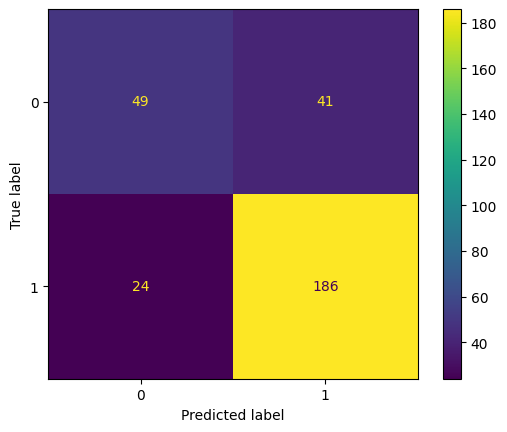

In [ ]:
Compute_IM_Scores(random_forest, X_train, y_train, X_test, y_test)

# Under-sampling methods

Undersampling techniques remove examples from the training dataset that belong to the majority class in order to better balance the class distribution.

* Undersample training instances of good class label using **RandomUnderSampler(), ClusterCentroids(),** and **CondensedNearestNeighbour()** functions

In [ ]:
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, CondensedNearestNeighbour

under_sampler = CondensedNearestNeighbour()
X_tr_resampled, y_tr_resampled = under_sampler.fit_resample(X_train, y_train)

# predict probabilities for test set
print("Unique lables: ", np.unique(y_train))
print("class distributions for imbalanced data:", np.bincount(y_train))
print("class distributions for balanced data:", np.bincount(y_tr_resampled))

Unique lables:  [0 1]
class distributions for imbalanced data: [210 490]
class distributions for balanced data: [210 194]


In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 1402)
random_forest.fit(X_tr_resampled, y_tr_resampled)
print("Training accuracy: ", random_forest.score(X_tr_resampled, y_tr_resampled))
print("Test accuracy: ", random_forest.score(X_test, y_test))

Training accuracy:  1.0
Test accuracy:  0.76


Precision for bad class:  0.5818181818181818
Precision for good class:  0.8631578947368421
Recall for bad class (TNR):  0.7111111111111111
Recall for good class (TPR):  0.780952380952381
F1 score for bad class: 0.64
F1 score for good class: 0.8200000000000001


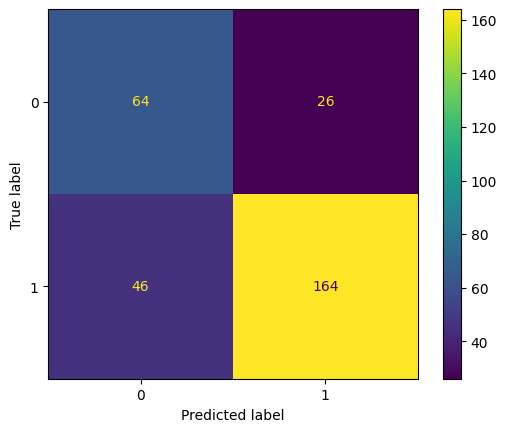

In [ ]:
Compute_IM_Scores(random_forest, X_train, y_train, X_test, y_test)